<a href="https://colab.research.google.com/github/Jxiang2/CMPUT340/blob/main/Copy_of_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Lab 1 - CMPUT 340</h1></center>
<b>Due date:</b> February, 02 (Demo) -- please sign up for a demonstration slot in the spreadsheet available on eClass.

<h2>Part 1 - Vectorized Implementation</h2>

In this lab you will learn the basics of Python and Numpy. You should start by reading and executing the code snipets in the following <a href="https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb#scrollTo=0vJLt3JRL9eR">Colab</a>, which was authored by Kevin Zakka, Justin Johnson, Volodymmyr Kuleshov, and Issac Caswell. 

Once you have finished reading and executing the Colab snipets, please read the snipets below and complete the code where needed. 

The snipet below creates matrices, A and B, with shape 3, 2 and 2, 4, respectively. The values of the matrices are chosen at random from the interval [0, 1). 

In [ ]:
import numpy as np
import time

A = np.random.rand(3, 2)
B = np.random.rand(2, 4)

print('A: ')
print(A)
print('B: ')
print(B)

A: 
[[0.07753336 0.57219178]
 [0.5187639  0.59385114]
 [0.85777415 0.11608883]]
B: 
[[0.61293993 0.08217906 0.66105097 0.09762215]
 [0.2462757  0.03032973 0.14744642 0.36206525]]


The following snipet will perform the multiplication of A and B using Numpy's standard implementation. 

In [ ]:
C = A.dot(B)
print('C = A x B')
print('C = ')
print(C)

C = A x B
C = 
[[0.18844022 0.02372604 0.13562114 0.21473973]
 [0.46422221 0.06064287 0.4304906  0.26565571]
 [0.55435388 0.07401201 0.58414931 0.12576948]]


Finish the implemention of the function multiply_matrices below. 

Certify that the matrix returned by your function matches the result of the operation A.dot(B) from the cell above. 

In [ ]:
def multiply_matrices(A, B):
    #shape[0]: number of dimension, shape[1]: number of elements in a dimension 
    C = np.zeros((A.shape[0], B.shape[1]))
    # implement here your vectorized solution
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            for k in range(B.shape[0]):
                C[i][j] += A[i][k]*B[k][j]
               
    return C

C = multiply_matrices(A, B)
print('C = A x B')
print('C = ')
print(C)

C = A x B
C = 
[[0.18844022 0.02372604 0.13562114 0.21473973]
 [0.46422221 0.06064287 0.4304906  0.26565571]
 [0.55435388 0.07401201 0.58414931 0.12576948]]


Next, implement a function called <b>multiply_matrices_vectorized</b> that also receives matrices A and B as input and returns C = A x B. Similarly to function multiply_matrices, you can assume that the multiplication is possible for A and B. 

In contrast with function multiply_matrices, your implementation of multiply_matrices_vectorized should contain only two 'for' loops; the innermost 'for' should be replaced by a vectorized implementation where you will use slicing, the operator * for two vectors, and the function sum from Numpy.

In [ ]:
def multiply_matrices_vectorized(A, B):
    C = np.zeros((A.shape[0], B.shape[1]))
    # implement here your vectorized solution
    for i in range(A.shape[0]):
      for j in range(B.shape[1]):
        c_vec = A[i]*B[ : , j]
        C[i][j] = np.sum(c_vec)
    return C

C = multiply_matrices_vectorized(A, B)
print('C = A x B')
print('C = ')
print(C)

C = A x B
C = 
[[0.18844022 0.02372604 0.13562114 0.21473973]
 [0.46422221 0.06064287 0.4304906  0.26565571]
 [0.55435388 0.07401201 0.58414931 0.12576948]]


We will use the library 'time' to measure the start and end time of the multiplication. The difference between the end time and start time gives the total running time in seconds of the operation. The snipet below will compare the running time of the different implementations. 

In [ ]:
time_start = time.time()
C = A.dot(B)
time_end = time.time()
print('Time function built-in function: %.6f seconds'% (time_end - time_start))

time_start = time.time()
C_ = multiply_matrices(A, B)
time_end = time.time()
print('Time function multiply_matrices: %.6f seconds'% (time_end - time_start))

time_start = time.time()
C__ = multiply_matrices_vectorized(A, B)
time_end = time.time()
print('Time function multiply_matrices_vectorized: %.6f seconds'% (time_end - time_start))

Time function built-in function: 0.000082 seconds
Time function multiply_matrices: 0.000152 seconds
Time function multiply_matrices_vectorized: 0.000256 seconds


Let's increase the size of the matrices to better distinguish the different implementations. We will now use matrices of shape 300x200 and 200x400. 

The built-in implementation should be the fastest because it uses a better algorithm than our naïve implementation. We should also notice a major difference in running time between multiply_matrices and multiply_matrices_vectorized. This is due to the vectorization we performed in the latter. 

The operations with vectors and matrices offered by Numpy are much more efficient than our implementation with a for-loop. That is why, whenever possible, we will prefer to use vectorized implementations of the algorithms in this course. 

In [ ]:
A = np.random.rand(300, 200)
B = np.random.rand(200, 400)

time_start = time.time()
C = A.dot(B)
time_end = time.time()
print('Time function built-in function: %.6f seconds'% (time_end - time_start))

time_start = time.time()
C = multiply_matrices(A, B)
time_end = time.time()
print('Time function multiply_matrices: %.6f seconds'% (time_end - time_start))

time_start = time.time()
C = multiply_matrices_vectorized(A, B)
time_end = time.time()
print('Time function multiply_matrices_vectorized: %.6f seconds'% (time_end - time_start))

Time function built-in function: 0.013292 seconds
Time function multiply_matrices: 31.760688 seconds
Time function multiply_matrices_vectorized: 0.833034 seconds


The next snipet creates a set of squared matrices of different sizes. Finish the implementation so that we invoke multiply_matrices and multiply_matrices_vectorized on all pairs of matrices (i.e., we will compute matrices_A[i] * matrices_B[i] for all i). The running time of both functions for all pairs should be stored in the lists time_multiply_matrices and time_multiply_matrices_vectorized. 

Use matplotlib to plot the running time of the two functions for the set of pairs of matrices. The x-axis should be labelled 'Size of the Matrices' and the y-axis should be labelled 'Running Time (seconds)'. Plot one line for each list (time_multiply_matrices and time_multiply_matrices_vectorized). 

In [ ]:
matrices_A = [np.random.rand(i, i) for i in range(1, 500, 100)]
matrices_B = [np.random.rand(i, i) for i in range(1, 500, 100)]
time_multiply_matrices = []
time_multiply_matrices_vectorized = []

# complete implementation
for i in range(len(matrices_A)):
  time_start1 = time.time()
  C1 = multiply_matrices(matrices_A[i], matrices_B[i])
  time_end1 = time.time()
  time_spent1 = time_end1 - time_start1
  time_multiply_matrices.append(time_spent1)

  time_start2 = time.time()
  C2 = multiply_matrices_vectorized(matrices_A[i], matrices_B[i])
  time_end2 = time.time()
  time_spent2 = time_end2 - time_start2
  time_multiply_matrices_vectorized.append(time_spent2)

print(time_multiply_matrices)
print(time_multiply_matrices_vectorized)





[2.0742416381835938e-05, 1.32694411277771, 10.611274242401123, 34.95645809173584, 82.3290479183197]
[6.508827209472656e-05, 0.06677913665771484, 0.29023289680480957, 0.6583411693572998, 1.2486324310302734]


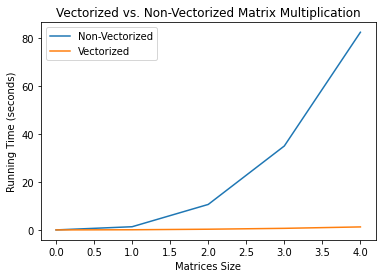

In [ ]:
import matplotlib.pyplot as plt

plt.plot(time_multiply_matrices)
plt.plot(time_multiply_matrices_vectorized)
plt.xlabel('Matrices Size')
plt.ylabel('Running Time (seconds)')
plt.title('Vectorized vs. Non-Vectorized Matrix Multiplication')
plt.legend(['Non-Vectorized', 'Vectorized'])

<h2>Part 2: LU Factorization</h2>

In this part of the lab you will implement two versions of the LU Factorization algorithm: the one presented in the pseudocode of the textbook and another that uses Numpy operations with matrices. We will then compare the performance of the two implementations on artificial problems. Here we will assume that the linear system has a single solution and that pivoting isn't needed (we will study pivoting in our Tuesday lecture).

In class we discussed how the matrix $A$ of a linear system $Ax = b$ can be decomposed into a lower triangular matrix $L$ and an upper triangular matrix $U$. i.e., $A = LU$. The decomposition allows us to write the original system as $LUx = b$. Then, we make $y = Ux$ and solve the system $Ly = b$ with an algorithm called forward-substitution. The solution $y$ is then be used to discover the solution to the original problem, by making $Ux = y$ and solving this system with the back-substitution algorithm. 

In class we studied the back-substitution algorithm, which is very similar to the forward-substitution algorithm. Back-substitution solves systems whose matrix A is an upper triangular matrix, while forward-substitution solves systems whose matrix A is a lower triangular matrix. 

Before moving forward, please take a look at the pseudocode of the forward and back-substitution algorithms in the textbook (see Algorithm 2.1 on page 64 and Algorithm 2.2 on page 65). If you understand the forward and back-substitution algorithms, then please go ahead and study the pseudocode of the LU-factorization (see Algorithm 2.3 on page 68 of the textbook). 

Let's now implement these three algorithms to solve the system used as example in class. 

\begin{align*}
Ax = \begin{bmatrix}
1 & 2 & 2 \\
4 & 4 & 2 \\
4 & 6 & 4 \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
\end{bmatrix} = 
\begin{bmatrix}
3 \\
6 \\
10 \\
\end{bmatrix} = b
\end{align*}

In [ ]:
import numpy as np
import time
import copy
import scipy.linalg

#A = np.array([[1,0,0],[0,1,0],[0,0,1],[-1,1,0],[-1,0,1],[0,-1,1]])
#b = np.array([1237,1941,2417,711,1177,475]).reshape(6,1)

#A = np.array([[1,0],[1,-0.5],[1,-0.6],[1,-0.5]])
#b = np.array([1,0.5,0.2,0.1])

A = np.array([[1,2,2],[4,4,2],[4,6,4]])
b = np.array([3,6,10]).reshape(3,1)

#A = np.array([[1, 2, 2], [4, 4, 2], [4, 6, 4]], dtype=float)
#b = np.array([3, 6, 10], dtype=float)
#b = b.reshape(3,1)

Finish the implementation of the algorithms below. The implementation of these algorithms should follow the pseudocode of the textbook. 

The output should be $x = [-1, 3, -1]^T$

In [ ]:
def forward_substituion(L, b):
  x = np.zeros(L.shape[0])
  n = len(x)
  
  for j in range(0, n ):
    if L[j][j] == 0:
      return None
    x[j] = b[j] / L[j][j]

    for i in range(j+1, n):
      b[i] = b[i] - L[i][j] * x[j]
    
  return x

def back_substituion(U, b):
  x = np.zeros(U.shape[0])
  n = len(x)
  
  for j in range(n - 1, -1, -1):
    if U[j][j] == 0:
      return None
    x[j] = b[j] / U[j][j] 

    for i in range(0, j):
      b[i] = b[i] - U[i][j] * x[j]

  return x
      

def lu_factor_v1(A):
  M = np.identity(A.shape[0])
  n = A.shape[0]
  
  for k in range(0, n-1):
    if A[k][k] == 0:
      return None

    for i in range(k+1, n):
      M[i][k] = A[i][k]/A[k][k]
  
    for j in range(k, n):
      for i in range(k+1, n):
        A[i][j] = A[i][j] - M[i][k] * A[k][j]

    

  return M, A

n = len(b)
A1 = copy.deepcopy(A)
b1 = copy.deepcopy(b)

#A1 = copy.deepcopy(A)
#b1 = copy.deepcopy(b)

L, U = lu_factor_v1(A1)
print(L)
print(U)
y = forward_substituion(L, b1)
x = back_substituion(U, y)

print('x: ', x)

[[1.  0.  0. ]
 [4.  1.  0. ]
 [4.  0.5 1. ]]
[[ 1  2  2]
 [ 0 -4 -6]
 [ 0  0 -1]]
x:  [-1.  3. -1.]


In [ ]:
#test the model with the x vector obtained above
def model(a, b, x):
  return a/(1 + b*x)
x_data = np.array([0,1,3,5], dtype=float)
y_data = np.array([1, 0.5, 0.2, 0.1], dtype=float)

pred = model(x[0], x[1], x_data)
print(pred)
print("Residual: " , np.linalg.norm(pred - y_data, ord = 2))

[-1.     -0.25   -0.1    -0.0625]
Residual:  2.163077957448598


Next, we will write a vectorized implementation of the LU factorization. For that you will modify your previous implementation. The only for-loop you will keep in the vectorized implementation is the outer loop of the non-vectorized implementation, the one that iterates over the $k-1$ columns of $A$. You should rely on numpy functions to rewrite the code.

In [ ]:
def lu_factor_v2(A):
  n = A.shape[1]
  L = np.eye(n)

  for k in range(n - 1):
    if A[k, k] == 0:
      return None
    
    #k+1th row to nth row
    L[k+1:, k] = A[k+1:, k] / A[k, k]
    A[k+1:, k+1:] = A[k+1:, k+1:] - L[k+1:,k]*A[k,k+1:]

  return L,A

    
L, U = lu_factor_v2(copy.deepcopy(A))
y = forward_substituion(L, copy.deepcopy(b))
x = back_substituion(U, y)
print('x: ', x)

x:  [-1.  3. -1.]


In the following snippet we will compare the running time of the vectorized and non-vectorized implementation by performing the LU-factorization on larger $200 \times 200$ matrices. 

In [ ]:
running_time_vectorized = []
running_time_non_vectorized = []

for _ in range(10):
    test_A = np.tril(np.random.rand(200, 200))
    
    A = copy.deepcopy(test_A)
    start = time.time()
    L, U = lu_factor_v1(A)
    end = time.time()
    running_time_non_vectorized.append(end - start)
    
    A = copy.deepcopy(test_A)
    start = time.time()
    L, U = lu_factor_v2(A)
    end = time.time()
    running_time_vectorized.append(end - start)

print('Non-Vectorized: %.4f seconds' % np.average(running_time_non_vectorized))
print('Vectorized: %.4f seconds' % np.average(running_time_vectorized))

KeyboardInterrupt: ignored